## Tercera parte pandas 
- Operaciones con fechas
- Combinar dataframes
- Reacomodar datos 

In [13]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
# Cargar nuestra base de datos de elencos
elenco = pd.read_csv(r'C:\Users\luism\Documents\data\cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [15]:
# Ahora tambien cargaremos datos de otra base de datos
# 
fecha_lanz = pd.read_csv(r'C:\Users\luism\Documents\data\release_dates.csv', encoding='utf-8')
fecha_lanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [16]:
# Que tal si cargamos esta base de datos pero la columna date la convertirmos a un 
# formato datetime que tiene metodos para hacer operaciones sobre fechas.. Mejor!

fecha_lanz = pd.read_csv(r'C:\Users\luism\Documents\data\release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
fecha_lanz.head()

C:\Users\luism\AppData\Local\Temp\ipykernel_9992\3509899908.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fecha_lanz = pd.read_csv(r'C:\Users\luism\Documents\data\release_dates.csv', parse_dates=['date'], infer_datetime_format=True)


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [17]:
# Podemos acceder a los metodos del namespace datetime, en pandas "dt"
fl = fecha_lanz

fl.date.dt.year

0         2007
1         2015
2         2015
3         2015
4         2016
          ... 
443551    2005
443552    2005
443553    2005
443554    2005
443555    2005
Name: date, Length: 443556, dtype: int32

In [18]:
# Con esto que podemos hacer un listado categorizando por algun elemento de la 
# fecha como por ejemplo:


<Axes: xlabel='date'>

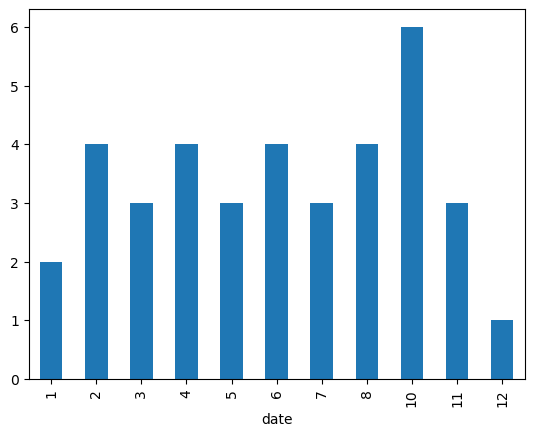

In [19]:
# En que meses se lanzan mas comunmente peliculas que contienen la palabra
# "horror"


fl = fecha_lanz 


fl = fl[(fl.title.str.contains('horror',case=False)) & (fl.country == 'USA')]

fl.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [20]:
# Exploremos la funcionalidad para unir dataframes con el metodo "merge"

In [21]:
e = elenco
e = e[e.name == "Denzel Washington"]
e.head()

,title,year,name,type,character,n
2288261,2 Guns,2013,Denzel Washington,actor,Bobby,1.0
2288262,A Soldier's Story,1984,Denzel Washington,actor,Private First Class Peterson,9.0
2288263,American Gangster,2007,Denzel Washington,actor,Frank Lucas,1.0
2288264,Antwone Fisher,2002,Denzel Washington,actor,Dr. Jerome Davenport,4.0
2288265,Carbon Copy,1981,Denzel Washington,actor,Roger Porter,5.0


In [22]:
# Nos interesa conocer la fecha de lanzamiento de las peliculas en la que ah participado 
# Denzel Washington.. Pero esa información esta en otro dataframe!!

In [23]:
fl = fecha_lanz
fl.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [24]:
# Es realmente sencillo con pandas y su poderoso comando "merge"
e = elenco

e = e[e.name == "Denzel Washington"]

e = e.merge(fecha_lanz)
e

,title,year,name,type,character,n,country,date
0,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Thailand,2013-08-01
1,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Canada,2013-08-02
2,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Turkey,2013-08-02
3,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,USA,2013-08-02
4,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Iceland,2013-08-08
...,...,...,...,...,...,...,...,...
1380,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Greece,1996-01-05
1381,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Brazil,1996-02-16
1382,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,UK,1996-05-31
1383,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Japan,1996-06-08


In [25]:
# Pero como funciona? 
# Empata para ambas dimensiones --> keys e indices las coincidencias y 
# agrega las entradas que no estan disponibles en el primer dataframe

# Por default nos funciono, pero el comando es muy flexible.
# Mas información: http://pandas.pydata.org/pandas-docs/stable/merging.html

## Otro concepto: Pivot

In [31]:
# Pivot permite el reacomodo de los valores del dataframe, moviendo una columna como 
# indice, otra como llave de datos y otra para los valores

# Ejemplo fechas de lanzamiento de peliculas Harry Potter en Mexico, USA y Canada
# Eliminar filas con valores NaN en las columnas 'title' y 'country' (si es necesario)
fl = fl.dropna(subset=['title', 'country'])

# Filtrar películas de Harry Potter en México, USA y Canadá
fl_hp = fl[(fl['title'].str.startswith("Harry Potter")) & fl['country'].isin(["Mexico", "USA", "Canada"])]

# Utilizar pivot para reorganizar los datos
pivot_fl = fl_hp.pivot(index='title', columns='country', values='date')

# Mostrar el DataFrame reorganizado
print(pivot_fl)

country                                          Canada     Mexico        USA
title                                                                        
Harry Potter and the Chamber of Secrets      2002-11-15 2002-11-29 2002-11-15
Harry Potter and the Deathly Hallows: Part 1 2010-11-19 2010-11-18 2010-11-19
Harry Potter and the Deathly Hallows: Part 2 2011-07-15 2011-07-15 2011-07-15
Harry Potter and the Goblet of Fire          2005-11-18 2005-11-18 2005-11-18
Harry Potter and the Half-Blood Prince       2009-07-15 2009-07-15 2009-07-15
Harry Potter and the Order of the Phoenix    2007-07-11 2007-07-12 2007-07-11
Harry Potter and the Prisoner of Azkaban     2004-06-04 2004-06-04 2004-06-04
Harry Potter and the Sorcerer's Stone        2001-11-16 2001-11-30 2001-11-16


In [32]:
# Reacomodemos los datos, 
# : title como indice
# : country como columnas
# : date como valores
# Eliminar filas con valores NaN en las columnas 'title', 'country' y 'date'
fl_cleaned = fecha_lanz.dropna(subset=['title', 'country', 'date'])

# Filtrar películas de Harry Potter en México, USA y Canadá
fl_hp = fl_cleaned[fl_cleaned['title'].str.startswith("Harry Potter")]
fl_hp = fl_hp[(fl_hp['country'] == "Mexico") | (fl_hp['country'] == "USA") | (fl_hp['country'] == "Canada")]

# Utilizar pivot para reorganizar los datos
fl_pivot = fl_hp.pivot(index='title', columns='country', values='date')

# Mostrar el DataFrame reorganizado
print(fl_pivot)
# Extra
#fl.apply(lambda x : x.dt.month)

country                                          Canada     Mexico        USA
title                                                                        
Harry Potter and the Chamber of Secrets      2002-11-15 2002-11-29 2002-11-15
Harry Potter and the Deathly Hallows: Part 1 2010-11-19 2010-11-18 2010-11-19
Harry Potter and the Deathly Hallows: Part 2 2011-07-15 2011-07-15 2011-07-15
Harry Potter and the Goblet of Fire          2005-11-18 2005-11-18 2005-11-18
Harry Potter and the Half-Blood Prince       2009-07-15 2009-07-15 2009-07-15
Harry Potter and the Order of the Phoenix    2007-07-11 2007-07-12 2007-07-11
Harry Potter and the Prisoner of Azkaban     2004-06-04 2004-06-04 2004-06-04
Harry Potter and the Sorcerer's Stone        2001-11-16 2001-11-30 2001-11-16


## Ejercicios


In [ ]:
# Del periodo 2010 al presente en cuantas peliculas ah participado
# la actriz ""

<Axes: xlabel='month'>

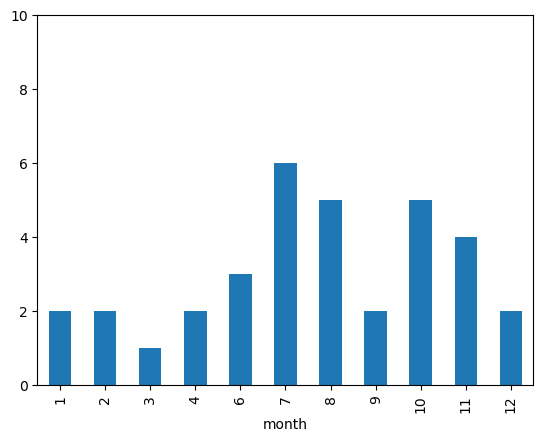

In [33]:
# En que fechas fue lanzada cada pelicula de "Salma Hayek"
# dentro de un periodo de 1990 al presente en Mexico
fl = fecha_lanz
fl = fl[fl.country == 'USA']

e = elenco
e = e[e.name == 'Salma Hayek']
e = e[(e.year > 1990)]

e = e.merge(fl)
#e
# Una nueva nueva columna con los valores del mes
e['month'] = e.date.dt.month
e
# Graficado
e.month.value_counts().sort_index().plot(kind='bar',ylim=[0,10])

<Axes: xlabel='date'>

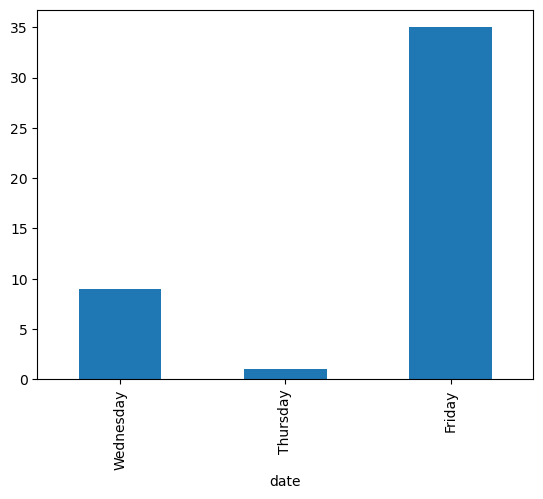

In [34]:
# En que dia de la semana se han lanzado en USA las peliculas de 
# donde aparece Tom Cuise.. Incluir un grafico 

fl = fecha_lanz
fl = fl[fl.country == 'USA']

e = elenco
e = e[ (e.name == 'Tom Cruise') ] 
wd = e.merge(fl).date.dt.dayofweek.value_counts().sort_index()
wd


wd = wd.rename({4:'Friday', 3:'Thursday', 2:'Wednesday'})
wd.plot(kind='bar')

<Axes: ylabel='title,year'>

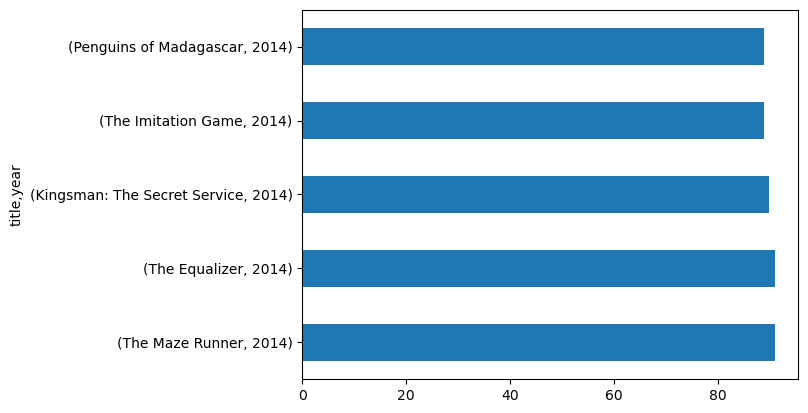

In [35]:
# Que peliculas han sido lanzadas en la mayor cantidad de 
# paises , incluir en un grafico las 5 mayores

fl = fecha_lanz

fl = fl.groupby(['title','year'])
fl.size().sort_values(ascending=False)[:5].plot(kind='barh')


In [36]:
# Quien tiende a ser el actor si clasificado (n > 1) que mas a 
# participado en peliculas donde el protagonista es
# Leonardo DiCaprio 

e = elenco
hf = e[(e.name == 'Leonardo DiCaprio') & (e.n == 1)]
er = e[(e.n > 1)]
mt = hf.merge(er,on=['title','year'])
mt.groupby(['name_x','name_y']).size().sort_values(ascending=False)

name_x             name_y             
Leonardo DiCaprio  Joseph P. Reidy        4
                   J.C. MacKenzie         3
                   Nellie Sciutto         3
                   Steve Witting          3
                   Joe Sheridan           2
                                         ..
                   Gloria Stuart          1
                   Golshifteh Farahani    1
                   Grace (II) Dove        1
                   Grant Swanby           1
                   Zineb Oukach           1
Length: 1064, dtype: int64